In [1]:
import imgaug
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
X = np.load("../data/processed/X_2c.npy")
y = np.load("../data/processed/y_2c.npy")

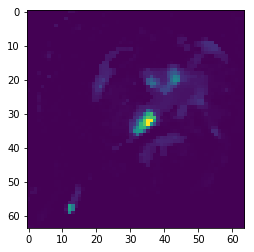

In [6]:
plt.imshow(X[0, : , :, 2])

In [3]:
X.shape

(296, 64, 64, 3)

In [4]:
def normalize_meanstd(a, axis=None): 
    # axis param denotes axes along which mean & std reductions are to be performed
    mean = np.mean(a, axis=axis, keepdims=True)
    std = np.sqrt(((a - mean)**2).mean(axis=axis, keepdims=True))
    return (a - mean) / std

X__ = normalize_meanstd(X, axis=(1,2))

def normalize_01(x, axis=None):
    x_min = x.min(axis=(1, 2), keepdims=True)
    x_max = x.max(axis=(1, 2), keepdims=True)

    return (x - x_min)/(x_max-x_min)

X_ = normalize_01(X)

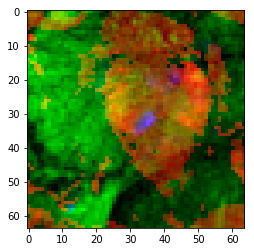

In [19]:
plt.imshow(X_[0])

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


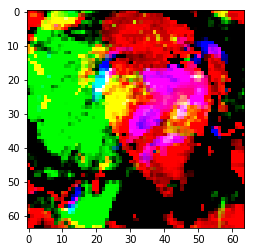

In [6]:
plt.imshow(X__[0])

In [7]:
from imgaug import augmenters as iaa

seq = iaa.Sequential([
    iaa.Crop(px=(0, 8)), # crop images from each side by 0 to 16px (randomly chosen)
    iaa.Fliplr(0.5), # horizontally flip 50% of the images
    
    iaa.SomeOf((0,3), [
        iaa.Fliplr(1),
        iaa.Flipud(1),
    ]),
    
    iaa.SomeOf((0,1),[
        iaa.GaussianBlur(sigma=(0, 0.5)), # blur images with a sigma of 0 to 3.0
        iaa.AverageBlur(k=(1, 3)),
        iaa.MedianBlur(k=1),

    ]),
    
    iaa.SomeOf((0,2), [
    iaa.SaltAndPepper(0.01, per_channel=True),
    iaa.Dropout(p=0.01, per_channel=True),
    iaa.OneOf([iaa.Multiply((0.5, 1.5)),
    iaa.Multiply((0.5, 1.5), per_channel=0.5)])
    
    ])
])

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


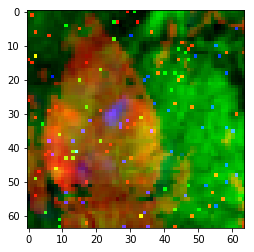

In [147]:
images_aug = seq.augment_image(X_[0])
plt.imshow(images_aug)

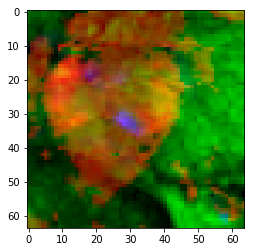

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


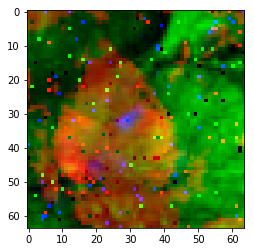

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


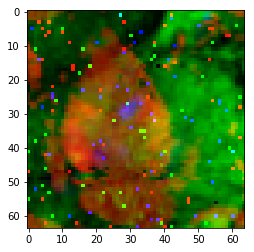

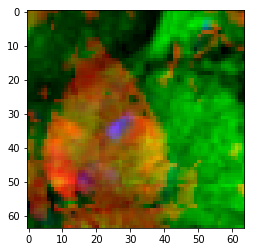

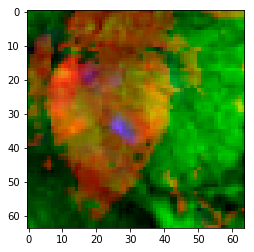

In [145]:
for _ in range(5):
    images_aug = seq.augment_image(X_[0])
    plt.imshow(images_aug)
    plt.show()

In [13]:
from skimage import exposure
import matplotlib

In [68]:
image = X__[0]

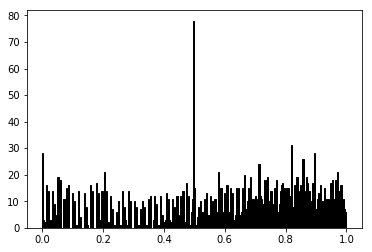

In [69]:
plt.hist(image.ravel(), bins=256, range=(0.0, 1.0), fc='k', ec='k')
plt.show()

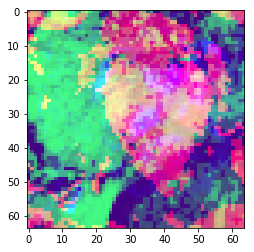

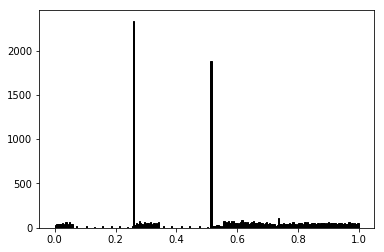

In [70]:
img_eq = exposure.equalize_hist(image)
plt.imshow(img_eq)
plt.show()
plt.hist(img_eq.ravel(), bins=256, range=(0.0, 1.0), fc='k', ec='k')
plt.show()


In [71]:
img_eq = exposure.equalize_adapthist(image)
plt.imshow(img_eq)
plt.show()
plt.hist(img_eq.ravel(), bins=256, range=(0.0, 1.0), fc='k', ec='k')
plt.show()

ValueError: Images of type float must be between -1 and 1.

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


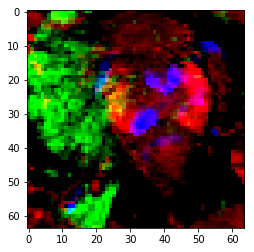

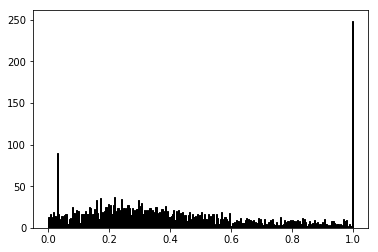

In [76]:
p2, p98 = np.percentile(image, (2, 98))
img_eq = exposure.rescale_intensity(image, in_range=(p2, p98))
plt.imshow(img_eq)
plt.show()
plt.hist(img_eq.ravel(), bins=256, range=(0.0, 1.0), fc='k', ec='k')
plt.show()

In [73]:
from skimage.morphology import disk
from skimage.filters import rank
selem = disk(100)
img_eq = rank.equalize(image[:, :, 0], selem=selem)
plt.imshow(img_eq)
plt.show()
plt.hist(img_eq.ravel(), bins=256, range=(0.0, 1.0), fc='k', ec='k')
plt.show()

ValueError: Images of type float must be between -1 and 1.

In [100]:
X_aa = np.empty((1000, 64, 64, 3))
y_ = []

samples_to_augment = 3
i = 0

In [101]:
for index, item in enumerate(X_aa):
    rnd = np.random.choice(X.shape[0], 1)[0]
    
    
    X_aa[index, :, :, : ] = X[rnd]
    y_.append(y[rnd])

In [102]:
X_aa.shape

(1000, 64, 64, 3)

In [104]:
len(y_)

1000

In [108]:
images_aug = seq.augment_images(X_aa)


In [109]:
images_aug.shape

(1000, 64, 64, 3)

In [18]:
plt.imshow(images_aug[23])
y[23]

NameError: name 'images_aug' is not defined

In [40]:
samples_to_augment = 1000
X_augmented = np.empty((samples_to_augment, 64, 64, 3))
y_ = []


In [41]:
i = 0
for index, item in enumerate(X_augmented - 1):
    rnd = np.random.choice(X.shape[0], 1)[0]
    X_augmented[index, :, :, : ] = X[rnd]
    y_.append(y[rnd])

In [45]:
X_augmented= np.concatenate([X_augmented, X], axis = 0)
y_ = np.concatenate([y_, y])

In [47]:
y_[1000]
y[0]

1

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


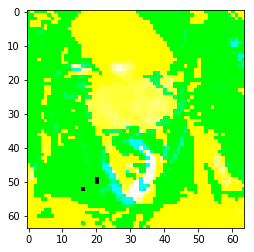

In [51]:
plt.imshow(X[100])

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


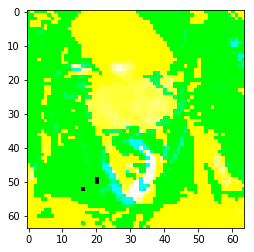

In [50]:
plt.imshow(X_augmented[1100])